# 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

plt.style.use("classic")

In [2]:
import os
import tarfile
import urllib
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH) :
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [3]:
def load_housing_data(housing_path=HOUSING_PATH) :
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

# 데이터 훑어보기

In [4]:
housing = load_housing_data()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

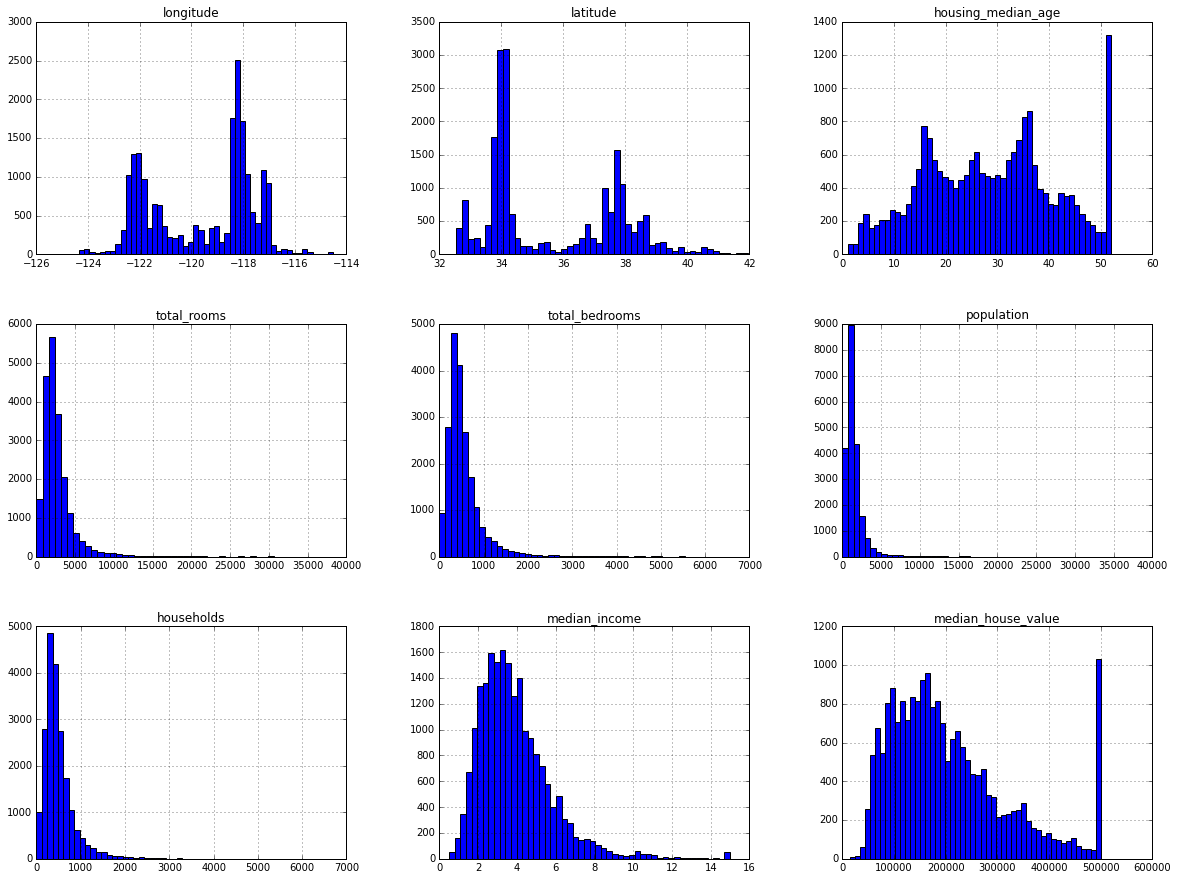

In [8]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

## 무작위 샘플링

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

## 계층적 샘플링
### -> 계층의 빈도수를 고려한 샘플링

<Axes: >

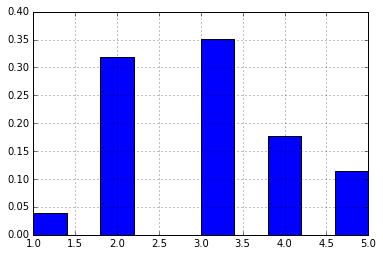

In [10]:
# 계층별 카테고리를 가지는 특성을 추가한다.
housing['income_cat'] = pd.cut(housing['median_income'], 
       bins = [0.0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5])
housing['income_cat'].hist(weights=np.ones(len(housing['income_cat'])) / len(housing['income_cat']))


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
# 계층별로 일정한 비율이 되게 샘플링 하기
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, 
                                                   random_state=42, 
                                                   stratify=housing['income_cat'])


# 비율 비교
print("orginal data : ")
print(housing['income_cat'].value_counts() / len(housing))
print("stratified data: ")
print(strat_train_set['income_cat'].value_counts() / len(strat_train_set))
print(strat_test_set['income_cat'].value_counts() / len(strat_test_set))

# income_cat 제거
strat_train_set.drop('income_cat', axis=1, inplace=True)
strat_test_set.drop('income_cat', axis=1, inplace=True)

orginal data : 
income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64
stratified data: 
income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64
income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


# 상관관계 조사

In [12]:
# 데이터 특성 끼리의 상관관계를 행렬 데이터로 구한다.
corr_matrix = housing.corr()

ValueError: could not convert string to float: 'NEAR BAY'

In [ ]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

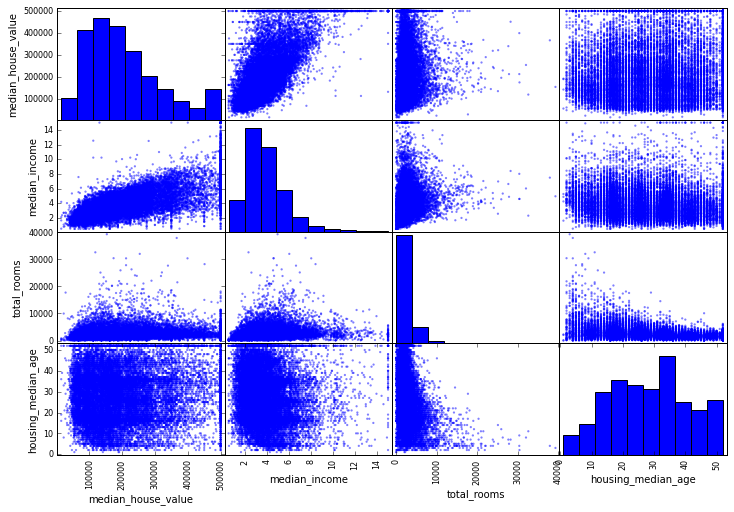

In [ ]:
# 상관관계 행렬표를 그린다. 
# 자신과의 상관관계는 의미가 없으므로 히스토그램을 그려준다.

from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms',
              'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

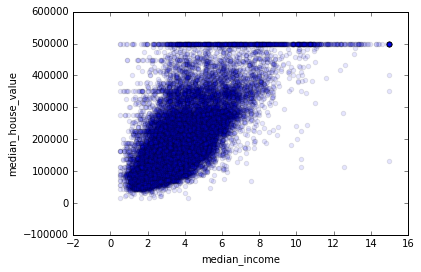

In [ ]:
# 위 상관관계 행렬표에서 [0,1] 에 있는 median_income, median_house_value 만 그림.
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

### 위 데이터를 보면 일부 데이터의 범위가 제한되어 있다.
### median_house_value 는 500_000 이 최대값이라 그 값이 넘어가는 값에 대해서는 전부 500_000 으로 책정된다. 
### 이는 학습할 때 적절하지 못하므로 전처리 과정이 필요하다.

In [ ]:
# 연관이 있을 것 같은 새로운 특성을 추가한다.
housing['rooms_per_househole'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [ ]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_househole         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [ ]:
# 학습해야하는 특성과 예측해야하는 특성을 분류한다.
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [ ]:
# null data 에 대해 전처리를 진행한다.
housing['total_bedrooms'].isnull().sum()

158

In [ ]:
# null data 가 있는 행을 날리는 방법
housing.dropna(subset=['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [ ]:
# null data 가 있는 특성 자체(열) 을 날리는 방법
housing.drop('total_bedrooms', axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,1208.0,501.0,4.1964,<1H OCEAN


In [ ]:
# null data 가 있는 특성의 평균으로 null data 를 채우는 방법
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace=True)

In [ ]:
# sklearn 에서 지원하는 방법 
# 단 수치형 데이터에만 계산가능하므로 그 외의 데이터 타입은 먼저 제거해야한다.

from sklearn.impute import SimpleImputer

# 현재 데이터에는 null data 가 없는 특성이라도 이후 추가되는 데이터에 null data 가 있는 경우 마찬가지로 median 으로 채워준다.
# 이때 fit method 를 사용할 시 적용된 평균값으로 이후에도 일관되게 채운다.
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
# imputer가 계산한 중간값 보기
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
X = imputer.transform(housing_num)

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [ ]:
housing_cat = housing[['ocean_proximity']]
housing_cat

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


In [ ]:
# 범주형 특성에 순서가 있다면 (이 경우는 없음) OrdinalEncoder 를 사용하여 분류한다.
from ast import Or
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [ ]:
# 분류된 특성
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
# 범주형 특성이 순서가 존재하지 않는 경우 사용하는 방법
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

# 값 중 오직 1개만 1 이므로 모든 데이터를 저장하는 건 비효율적이므로 sparse matrix(희소 행렬) 형태로 저장한다.
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
# 분류된 특성 보기
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# 나만의 변환기 만들기

In [ ]:
from msilib import add_tables
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin) :
    def __init__(self, add_bedrooms_per_room = True) :
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None) :
        return self
    
    def transform(self, X) :
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room :
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else :
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

# 각 칼럼별로 별로의 pipeline 적용하기
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)
# 원래 특성 9개 + attribs_adder 에 의해 추가된 특성 3개 + (범주형 특성 1개 -> 5개) 4개 = 16개 
print(housing_prepared.shape)
housing_prepared

(16512, 16)


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

# model 선택과 훈련

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# linear regression 
X_train, X_test, y_train, y_test = train_test_split(housing_prepared, housing_labels, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(f"train score : {lin_reg.score(X_train, y_train):0.3f}")
print(f"test score : {lin_reg.score(X_test, y_test):0.3f}")

train score : 0.646
test score : 0.652


In [ ]:
# decision tree regression
from sklearn.tree import DecisionTreeClassifier

tree_reg = DecisionTreeClassifier()
tree_reg.fit(X_train, y_train)
print(f"train score : {tree_reg.score(X_train, y_train):0.3f}")
print(f'test score : {tree_reg.score(X_test, y_test):0.3f}')

train score : 1.000
test score : 0.029


In [ ]:
# random forest regression
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
print(f"train score : {forest_reg.score(X_train, y_train):0.3f}")
print(f"test score : {forest_reg.score(X_test, y_test):0.3f}")

train score : 0.973
test score : 0.809


### linear 은 훈련이 적절히 이루어진 것으로 보이지만 성능이 좋다고 할 수 없다
### decision tree regression 은 train score 은 만점이나 test score 은 0에 가까우므로 과적합했다는 것을 알 수 있다.
### random forest regression 은 성능이 나쁘지는 않으나 train score test_score 에 비해 높아 과적합의 우려가 있다.

# 모델 세부 튜닝

In [ ]:
# 그리드 탐색
from sklearn.model_selection import GridSearchCV

# random forest 에서 모집단에서 표본을 샘플링할 때 무작위 복원 추출하는 것을 bootstrap 이라 한다.
param_grid = [
    {'n_estimators' : [3,10,30], 'max_features' : [2,4,6,8]},
    {'bootstrap' : [False], 'n_estimators' : [3,10], 'max_features' : [2,3,4]}
]

# 각각의 prama_grid 에 대해 교차검증을 진행하여 학습 점수를 계산한다.
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True)

In [ ]:
# 가장 성능이 좋은 매개변수에 적용한 test score
print(f"test_score : {grid_search.score(X_test, y_test):0.3f}")
print("최적 매개변수 : ", grid_search.best_params_)
print(f"최고 교차검증 점수 : {grid_search.best_score_:0.3f}")
print("최고 성능 모델 : ", grid_search.best_estimator_)

test_score : 0.812
최적 매개변수 :  {'max_features': 6, 'n_estimators': 30}
최고 교차검증 점수 : 0.804
최고 성능 모델 :  RandomForestRegressor(max_features=6, n_estimators=30)


In [ ]:
# 모든 조합의 점수
cvres = grid_search.cv_results_

res = []
for mean_score, param in zip(cvres['mean_test_score'], cvres['params']) :
    res.append([mean_score, param])

res.sort(key=lambda x : -x[0])
for i in res :
    print(*i)

0.8039385704582089 {'max_features': 6, 'n_estimators': 30}
0.8037441827720823 {'max_features': 8, 'n_estimators': 30}
0.8020994485929144 {'max_features': 4, 'n_estimators': 30}
0.7905348449081911 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}
0.7902214128787486 {'max_features': 6, 'n_estimators': 10}
0.7853662700923099 {'max_features': 8, 'n_estimators': 10}
0.7851448037814712 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.7842530655568273 {'max_features': 2, 'n_estimators': 30}
0.7818287832755505 {'max_features': 4, 'n_estimators': 10}
0.773984576259332 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.757076928422883 {'max_features': 2, 'n_estimators': 10}
0.7309609086274126 {'max_features': 8, 'n_estimators': 3}
0.7296459733209513 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
0.7277770705445231 {'max_features': 6, 'n_estimators': 3}
0.7210197708709096 {'max_features': 4, 'n_estimators': 3}
0.717588666435016 {'bootstrap': False, 'm

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.95331761e-02, 6.53048025e-02, 4.49559839e-02, 1.89634095e-02,
       1.63987740e-02, 1.72237282e-02, 1.74095545e-02, 3.69448288e-01,
       5.17676312e-02, 1.10390135e-01, 6.37286771e-02, 7.88829156e-03,
       1.37747024e-01, 3.26442046e-08, 4.51028215e-03, 4.73021003e-03])

In [ ]:
# 중요도가 높은 순서대로 특성 살펴보기
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs =list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)


[(0.36944828817845654, 'median_income'),
 (0.13774702362611296, 'INLAND'),
 (0.11039013490029494, 'pop_per_hhold'),
 (0.06953317612255325, 'longitude'),
 (0.0653048025022372, 'latitude'),
 (0.06372867708137439, 'bedrooms_per_room'),
 (0.051767631159952414, 'rooms_per_hhold'),
 (0.04495598386225597, 'housing_median_age'),
 (0.01896340952907616, 'total_rooms'),
 (0.017409554512026196, 'households'),
 (0.01722372816078521, 'population'),
 (0.016398773979083424, 'total_bedrooms'),
 (0.00788829155697232, '<1H OCEAN'),
 (0.004730210031417723, 'NEAR OCEAN'),
 (0.004510282153196765, 'NEAR BAY'),
 (3.2644204603032755e-08, 'ISLAND')]

In [ ]:
final_model = grid_search.best_estimator_

array([6.95331761e-02, 6.53048025e-02, 4.49559839e-02, 1.89634095e-02,
       1.63987740e-02, 1.72237282e-02, 1.74095545e-02, 3.69448288e-01,
       5.17676312e-02, 1.10390135e-01, 6.37286771e-02, 7.88829156e-03,
       1.37747024e-01, 3.26442046e-08, 4.51028215e-03, 4.73021003e-03])